## Ê∑±ÂÖ•ÊµÖÂá∫pandas-2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'].insert(0, 'SimHei')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%config InlineBackend.figure_format = 'svg'

### Êï∞ÊçÆÈÄèËßÜ

1. Êï∞ÊçÆËÅöÂêàÔºàÊåáÊ†áÁªüËÆ°Ôºâ
2. ÊéíÂ∫èÂíåÂ§¥ÈÉ®ÂÄº
3. ÈÄèËßÜË°®Âíå‰∫§ÂèâË°®

In [3]:
sales_df = pd.read_excel('res/2020Âπ¥ÈîÄÂîÆÊï∞ÊçÆ.xlsx', sheet_name='data')
sales_df.head(5)

ÈîÄÂîÆÊó•Êúü ÈîÄÂîÆÂå∫Âüü ÈîÄÂîÆÊ∏†ÈÅì        ÈîÄÂîÆËÆ¢Âçï   ÂìÅÁâå   ÂîÆ‰ª∑  ÈîÄÂîÆÊï∞Èáè  Áõ¥Êé•ÊàêÊú¨
0 2020-01-01   ‰∏äÊµ∑  ÊãºÂ§öÂ§ö  182894-455  ÂÖ´ÂåπÈ©¨   99    83  3351
1 2020-01-01   ‰∏äÊµ∑   ÊäñÈü≥  205635-402  ÂÖ´ÂåπÈ©¨  219    29  1016
2 2020-01-01   ‰∏äÊµ∑   Â§©Áå´  205654-021  ÂÖ´ÂåπÈ©¨  169    85  6320
3 2020-01-01   ‰∏äÊµ∑   Â§©Áå´  205654-519  ÂÖ´ÂåπÈ©¨  169    14   485
4 2020-01-01   ‰∏äÊµ∑   Â§©Áå´  377781-010  ÁöÆÁöÆËôæ  249    61  2452

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ÈîÄÂîÆÊó•Êúü    1945 non-null   datetime64[ns]
 1   ÈîÄÂîÆÂå∫Âüü    1945 non-null   object        
 2   ÈîÄÂîÆÊ∏†ÈÅì    1945 non-null   object        
 3   ÈîÄÂîÆËÆ¢Âçï    1945 non-null   object        
 4   ÂìÅÁâå      1945 non-null   object        
 5   ÂîÆ‰ª∑      1945 non-null   int64         
 6   ÈîÄÂîÆÊï∞Èáè    1945 non-null   int64         
 7   Áõ¥Êé•ÊàêÊú¨    1945 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 121.7+ KB


In [5]:
# Ê∑ªÂä†ÈîÄÂîÆÈ¢ù„ÄÅÊØõÂà©Ê∂¶„ÄÅÊúà‰ªΩÂàó
sales_df['ÈîÄÂîÆÈ¢ù'] = sales_df.ÂîÆ‰ª∑ * sales_df.ÈîÄÂîÆÊï∞Èáè
sales_df['ÊØõÂà©Ê∂¶'] = sales_df.ÈîÄÂîÆÈ¢ù - sales_df.Áõ¥Êé•ÊàêÊú¨
sales_df['Êúà‰ªΩ'] = sales_df.ÈîÄÂîÆÊó•Êúü.dt.month
sales_df.head(5)

ÈîÄÂîÆÊó•Êúü ÈîÄÂîÆÂå∫Âüü ÈîÄÂîÆÊ∏†ÈÅì        ÈîÄÂîÆËÆ¢Âçï   ÂìÅÁâå   ÂîÆ‰ª∑  ÈîÄÂîÆÊï∞Èáè  Áõ¥Êé•ÊàêÊú¨    ÈîÄÂîÆÈ¢ù    ÊØõÂà©Ê∂¶  Êúà‰ªΩ
0 2020-01-01   ‰∏äÊµ∑  ÊãºÂ§öÂ§ö  182894-455  ÂÖ´ÂåπÈ©¨   99    83  3351   8217   4866   1
1 2020-01-01   ‰∏äÊµ∑   ÊäñÈü≥  205635-402  ÂÖ´ÂåπÈ©¨  219    29  1016   6351   5335   1
2 2020-01-01   ‰∏äÊµ∑   Â§©Áå´  205654-021  ÂÖ´ÂåπÈ©¨  169    85  6320  14365   8045   1
3 2020-01-01   ‰∏äÊµ∑   Â§©Áå´  205654-519  ÂÖ´ÂåπÈ©¨  169    14   485   2366   1881   1
4 2020-01-01   ‰∏äÊµ∑   Â§©Áå´  377781-010  ÁöÆÁöÆËôæ  249    61  2452  15189  12737   1

In [6]:
def make_tag(price):
    if price < 300:
        return '‰ΩéÁ´Ø'
    elif price < 800:
        return '‰∏≠Á´Ø'
    return 'È´òÁ´Ø'

In [7]:
# Ê†πÊçÆÂïÜÂìÅÁöÑ‰ª∑Ê†ºÊ∑ªÂä†‰ª∑‰ΩçÊ†áÁ≠æ
sales_df['‰ª∑‰Ωç'] = sales_df.ÂîÆ‰ª∑.apply(make_tag)
sales_df.head(5)

ÈîÄÂîÆÊó•Êúü ÈîÄÂîÆÂå∫Âüü ÈîÄÂîÆÊ∏†ÈÅì        ÈîÄÂîÆËÆ¢Âçï   ÂìÅÁâå   ÂîÆ‰ª∑  ÈîÄÂîÆÊï∞Èáè  Áõ¥Êé•ÊàêÊú¨    ÈîÄÂîÆÈ¢ù    ÊØõÂà©Ê∂¶  Êúà‰ªΩ  ‰ª∑‰Ωç
0 2020-01-01   ‰∏äÊµ∑  ÊãºÂ§öÂ§ö  182894-455  ÂÖ´ÂåπÈ©¨   99    83  3351   8217   4866   1  ‰ΩéÁ´Ø
1 2020-01-01   ‰∏äÊµ∑   ÊäñÈü≥  205635-402  ÂÖ´ÂåπÈ©¨  219    29  1016   6351   5335   1  ‰ΩéÁ´Ø
2 2020-01-01   ‰∏äÊµ∑   Â§©Áå´  205654-021  ÂÖ´ÂåπÈ©¨  169    85  6320  14365   8045   1  ‰ΩéÁ´Ø
3 2020-01-01   ‰∏äÊµ∑   Â§©Áå´  205654-519  ÂÖ´ÂåπÈ©¨  169    14   485   2366   1881   1  ‰ΩéÁ´Ø
4 2020-01-01   ‰∏äÊµ∑   Â§©Áå´  377781-010  ÁöÆÁöÆËôæ  249    61  2452  15189  12737   1  ‰ΩéÁ´Ø

In [8]:
# ÁªüËÆ°ÂåóÊûÅÊòüÊåáÊ†á
GMV, profit, quantity = sales_df[['ÈîÄÂîÆÈ¢ù', 'ÊØõÂà©Ê∂¶', 'ÈîÄÂîÆÊï∞Èáè']].sum()
print(f'ÈîÄÂîÆÈ¢ù: {GMV}ÂÖÉ')
print(f'ÊØõÂà©Ê∂¶: {profit}ÂÖÉ')
print(f'ÈîÄÂîÆÊï∞Èáè: {quantity}‰ª∂')
print(f'ÊØõÂà©Áéá: {profit / GMV:.2%}')

ÈîÄÂîÆÈ¢ù: 39772087ÂÖÉ
ÊØõÂà©Ê∂¶: 27926715ÂÖÉ
ÈîÄÂîÆÊï∞Èáè: 107403‰ª∂
ÊØõÂà©Áéá: 70.22%


In [9]:
# ÁªüËÆ°ÊØè‰∏™ÊúàÁöÑÈîÄÂîÆÈ¢ùÂíåÊØõÂà©Ê∂¶
temp1 = sales_df.groupby('Êúà‰ªΩ')[['ÈîÄÂîÆÈ¢ù', 'ÊØõÂà©Ê∂¶']].agg('sum')
temp1

ÈîÄÂîÆÈ¢ù      ÊØõÂà©Ê∂¶
Êúà‰ªΩ                  
1   5409855  3845162
2   4608455  3190039
3   4164972  2934584
4   3996770  2882592
5   3239005  2272902
6   2817936  1897643
7   3501304  2449313
8   2948189  2071782
9   2632960  1849277
10  2375385  1671442
11  2385283  1691646
12  1691973  1170333

In [10]:
# ‰ΩøÁî®ÈÄèËßÜË°®ÁªüËÆ°ÊØè‰∏™ÊúàÁöÑÈîÄÂîÆÈ¢ùÂíåÊØõÂà©Ê∂¶
pd.pivot_table(
    sales_df,
    index='Êúà‰ªΩ',
    values=['ÈîÄÂîÆÈ¢ù', 'ÊØõÂà©Ê∂¶'],
    aggfunc='sum'
)

ÊØõÂà©Ê∂¶      ÈîÄÂîÆÈ¢ù
Êúà‰ªΩ                  
1   3845162  5409855
2   3190039  4608455
3   2934584  4164972
4   2882592  3996770
5   2272902  3239005
6   1897643  2817936
7   2449313  3501304
8   2071782  2948189
9   1849277  2632960
10  1671442  2375385
11  1691646  2385283
12  1170333  1691973

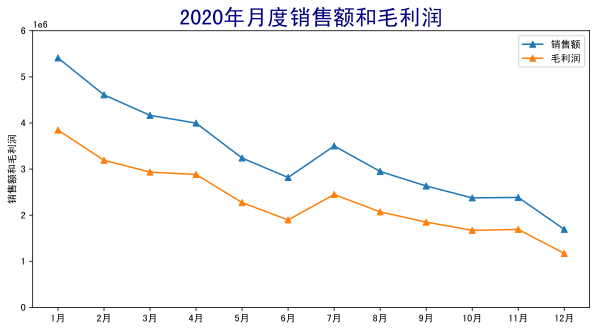

In [11]:
# ÁªòÂà∂ÊäòÁ∫øÂõæ
temp1.plot(
    kind='line',
    figsize=(10, 5),
    y=['ÈîÄÂîÆÈ¢ù', 'ÊØõÂà©Ê∂¶'],   # ÊîæÂà∞Á∫µËΩ¥‰∏äÁöÑÊï∞ÊçÆ
    xlabel='',              # Ê®™ËΩ¥ÁöÑÊ†áÁ≠æ
    ylabel='ÈîÄÂîÆÈ¢ùÂíåÊØõÂà©Ê∂¶',  # Á∫µËΩ¥ÁöÑÊ†áÁ≠æ
    marker='^',             # Ê†áËÆ∞ÁÇπÁ¨¶Âè∑
)
# plt.fill_between(np.arange(1, 13), temp1.ÈîÄÂîÆÈ¢ù, where=temp1.ÈîÄÂîÆÈ¢ù >= 3e6, facecolor='red', alpha=0.25)
# plt.fill_between(np.arange(1, 13), temp1.ÈîÄÂîÆÈ¢ù, where=temp1.ÈîÄÂîÆÈ¢ù < 3e6, facecolor='green', alpha=0.25)
# ÂÆöÂà∂Á∫µËΩ¥ÁöÑÂèñÂÄºËåÉÂõ¥
plt.ylim(0, 6e6)
# ÂÆöÂà∂Ê®™ËΩ¥ÁöÑÂàªÂ∫¶
plt.xticks(np.arange(1, 13), labels=[f'{x}Êúà' for x in range(1, 13)])
# ÂÆöÂà∂Ê†áÈ¢ò
plt.title('2020Âπ¥ÊúàÂ∫¶ÈîÄÂîÆÈ¢ùÂíåÊØõÂà©Ê∂¶', fontdict={'fontsize': 22, 'color': 'navy'})
plt.show()

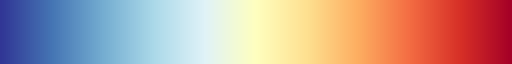

In [12]:
plt.cm.RdYlBu_r

In [13]:
# ËÆ°ÁÆóÊúàÁéØÊØî
temp1['ÈîÄÂîÆÈ¢ùÊúàÁéØÊØî'] = temp1.ÈîÄÂîÆÈ¢ù.pct_change()
temp1['ÊØõÂà©Ê∂¶ÊúàÁéØÊØî'] = temp1.ÊØõÂà©Ê∂¶.pct_change()
# Á¥¢ÂºïÈáçÊéíÂ∫è
temp1 = temp1.reindex(columns=['ÈîÄÂîÆÈ¢ù', 'ÈîÄÂîÆÈ¢ùÊúàÁéØÊØî', 'ÊØõÂà©Ê∂¶', 'ÊØõÂà©Ê∂¶ÊúàÁéØÊØî'])
# Ê∏≤ÊüìËæìÂá∫
temp1.style.format(
    formatter={
        'ÈîÄÂîÆÈ¢ùÊúàÁéØÊØî': '{:.2%}',
        'ÊØõÂà©Ê∂¶ÊúàÁéØÊØî': '{:.2%}'
    },
    na_rep='-------'
).background_gradient(
    'RdYlBu_r',
    subset=['ÈîÄÂîÆÈ¢ùÊúàÁéØÊØî', 'ÊØõÂà©Ê∂¶ÊúàÁéØÊØî']
)

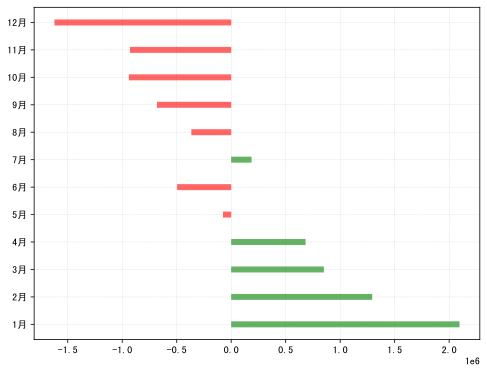

In [14]:
# ÁªòÂà∂Ê®™Á∫øÂõæ
mu = temp1.ÈîÄÂîÆÈ¢ù.mean()
temp1['diff'] = temp1.ÈîÄÂîÆÈ¢ù - mu
temp1['colors'] = temp1.ÈîÄÂîÆÈ¢ù.map(lambda x: 'green' if x > mu else 'red')

plt.figure(figsize=(8, 6), dpi=200)
plt.hlines(y=temp1.index, xmin=0, xmax=temp1['diff'], color=temp1.colors, alpha=0.6, linewidth=6)
plt.yticks(np.arange(1, 13), labels=[f'{x}Êúà' for x in np.arange(1, 13)])
# ÂÆöÂà∂ÁΩëÊ†ºÁ∫ø
plt.grid(linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

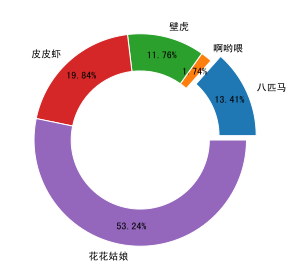

In [15]:
# ÂêÑÂìÅÁâåÂØπÈîÄÂîÆÈ¢ùË¥°ÁåÆÂç†ÊØî
temp2 = sales_df.groupby('ÂìÅÁâå')['ÈîÄÂîÆÈ¢ù'].sum()
temp2.plot(
    kind='pie',
    ylabel='',
    autopct='%.2f%%',  # Ëá™Âä®ËÆ°ÁÆóÂπ∂ÊòæÁ§∫ÁôæÂàÜÊØî
    pctdistance=0.82,  # ÁôæÂàÜÊØîÊ†áÁ≠æÂà∞ÂúÜÂøÉÁöÑË∑ùÁ¶ª
    wedgeprops=dict(width=0.35, edgecolor='w'),  # ÂÆöÂà∂ÁéØÁä∂È•ºÂõæ
    explode=[0.1, 0, 0, 0, 0],  # ÂàÜÁ¶ªÈ•ºÂõæ
)
plt.show()

In [16]:
# ÂêÑÈîÄÂîÆÂå∫ÂüüÊØè‰∏™ÊúàÁöÑÈîÄÂîÆÈ¢ù
temp3 = sales_df.groupby(['ÈîÄÂîÆÂå∫Âüü', 'Êúà‰ªΩ'], as_index=False)[['ÈîÄÂîÆÈ¢ù']].sum()
# pivot - Â∞ÜË°åÊóãËΩ¨Âà∞Âàó‰∏äÔºàÁ™ÑË°® ----> ÂÆΩË°®Ôºâ
# melt - Â∞ÜÂàóÊóãËΩ¨Âà∞Ë°å‰∏äÔºàÂÆΩË°® ----> Á™ÑË°®Ôºâ
temp3.pivot(index='ÈîÄÂîÆÂå∫Âüü', columns='Êúà‰ªΩ', values='ÈîÄÂîÆÈ¢ù').fillna(0).astype('i8')

Êúà‰ªΩ         1        2        3        4        5        6        7       8   \
ÈîÄÂîÆÂå∫Âüü                                                                          
‰∏äÊµ∑    1679125  1689527  1061193  1082187   841199   785404   863906  734937   
Âåó‰∫¨    1878234  1807787  1360666  1205989   807300  1216432  1219083  645727   
ÂÆâÂæΩ          0        0        0   341308   554155        0        0       0   
Âπø‰∏ú          0        0   388180        0        0        0        0  469390   
Ê±üËãè          0        0        0   537079        0        0   841032       0   
ÊµôÊ±ü          0        0   248354        0        0        0        0  439508   
Á¶èÂª∫    1852496  1111141  1106579   830207  1036351   816100   577283  658627   

Êúà‰ªΩ         9       10      11      12  
ÈîÄÂîÆÂå∫Âüü                                   
‰∏äÊµ∑    1107693  412108  825169  528041  
Âåó‰∫¨     390077  671608  678668  596146  
ÂÆâÂæΩ          0       0       0       0  
Âπø‰∏ú     365191       0  395188       0  
Ê±üËãè          0  710962       0  215307  
ÊµôÊ±ü          0       0       0       0  
Á¶èÂª∫     769999  580707  486258  352479

In [17]:
# ÂàõÂª∫ÈÄèËßÜË°®
pd.pivot_table(
    sales_df,
    index='ÈîÄÂîÆÂå∫Âüü',
    columns='Êúà‰ªΩ',
    values='ÈîÄÂîÆÈ¢ù',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='ÊÄªËÆ°'
)

Êúà‰ªΩ          1        2        3        4        5        6        7        8  \
ÈîÄÂîÆÂå∫Âüü                                                                           
‰∏äÊµ∑    1679125  1689527  1061193  1082187   841199   785404   863906   734937   
Âåó‰∫¨    1878234  1807787  1360666  1205989   807300  1216432  1219083   645727   
ÂÆâÂæΩ          0        0        0   341308   554155        0        0        0   
Âπø‰∏ú          0        0   388180        0        0        0        0   469390   
Ê±üËãè          0        0        0   537079        0        0   841032        0   
ÊµôÊ±ü          0        0   248354        0        0        0        0   439508   
Á¶èÂª∫    1852496  1111141  1106579   830207  1036351   816100   577283   658627   
ÊÄªËÆ°    5409855  4608455  4164972  3996770  3239005  2817936  3501304  2948189   

Êúà‰ªΩ          9       10       11       12        ÊÄªËÆ°  
ÈîÄÂîÆÂå∫Âüü                                                
‰∏äÊµ∑    1107693   412108   825169   528041  11610489  
Âåó‰∫¨     390077   671608   678668   596146  12477717  
ÂÆâÂæΩ          0        0        0        0    895463  
Âπø‰∏ú     365191        0   395188        0   1617949  
Ê±üËãè          0   710962        0   215307   2304380  
ÊµôÊ±ü          0        0        0        0    687862  
Á¶èÂª∫     769999   580707   486258   352479  10178227  
ÊÄªËÆ°    2632960  2375385  2385283  1691973  39772087

In [18]:
# Â∞Ü‰ª∑‰ΩçÂ≠óÊÆµÂ§ÑÁêÜÊàêcategoryÁ±ªÂûãÂπ∂ÊåáÂÆöÊéíÂ∫èÁöÑÈ°∫Â∫è
sales_df['‰ª∑‰Ωç'] = sales_df.‰ª∑‰Ωç.astype('category').cat.reorder_categories(['È´òÁ´Ø', '‰∏≠Á´Ø', '‰ΩéÁ´Ø'])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ÈîÄÂîÆÊó•Êúü    1945 non-null   datetime64[ns]
 1   ÈîÄÂîÆÂå∫Âüü    1945 non-null   object        
 2   ÈîÄÂîÆÊ∏†ÈÅì    1945 non-null   object        
 3   ÈîÄÂîÆËÆ¢Âçï    1945 non-null   object        
 4   ÂìÅÁâå      1945 non-null   object        
 5   ÂîÆ‰ª∑      1945 non-null   int64         
 6   ÈîÄÂîÆÊï∞Èáè    1945 non-null   int64         
 7   Áõ¥Êé•ÊàêÊú¨    1945 non-null   int64         
 8   ÈîÄÂîÆÈ¢ù     1945 non-null   int64         
 9   ÊØõÂà©Ê∂¶     1945 non-null   int64         
 10  Êúà‰ªΩ      1945 non-null   int32         
 11  ‰ª∑‰Ωç      1945 non-null   category      
dtypes: category(1), datetime64[ns](1), int32(1), int64(5), object(4)
memory usage: 161.7+ KB


In [19]:
# ÁªüËÆ°ÊØè‰∏™ÊúàÂêÑÁßç‰ª∑‰Ωç‰∫ßÂìÅÁöÑÈîÄÈáè
temp4 = sales_df.pivot_table(
    index='‰ª∑‰Ωç',
    columns='Êúà‰ªΩ',
    values='ÈîÄÂîÆÊï∞Èáè',
    observed=False,
    fill_value=0,
    aggfunc='sum'
)
temp4

Êúà‰ªΩ    1     2     3     4     5     6     7     8     9     10    11    12
‰ª∑‰Ωç                                                                        
È´òÁ´Ø  1157   897   642   685   490   378   541   528   210   113    93   127
‰∏≠Á´Ø  6518  4963  5469  5155  4170  3679  4361  3680  3412  3104  3225  2048
‰ΩéÁ´Ø  5220  5525  5127  4430  4625  3947  4184  3233  3618  4008  4199  3642

In [20]:
# ‰∫§ÂèâË°®
pd.crosstab(
    index=sales_df.‰ª∑‰Ωç,
    columns=sales_df.Êúà‰ªΩ,
    values=sales_df.ÈîÄÂîÆÊï∞Èáè,
    aggfunc='sum'
)

Êúà‰ªΩ    1     2     3     4     5     6     7     8     9     10    11    12
‰ª∑‰Ωç                                                                        
È´òÁ´Ø  1157   897   642   685   490   378   541   528   210   113    93   127
‰∏≠Á´Ø  6518  4963  5469  5155  4170  3679  4361  3680  3412  3104  3225  2048
‰ΩéÁ´Ø  5220  5525  5127  4430  4625  3947  4184  3233  3618  4008  4199  3642

In [21]:
blood_types = np.array(['B', 'A', 'O', 'O', 'AB', 'B', 'O', 'B', 'AB', 'A', 'A', 'O', 'B', 'O', 'O', 'O', 'O', 'A', 'B', 'B'])
personality_types = np.array(['ùõÉ', 'ùõÇ', 'ùõÇ', 'ùõÇ', 'ùõÉ', 'ùõÇ', 'ùõÑ', 'ùõÑ', 'ùõÇ', 'ùõÑ', 'ùõÉ', 'ùõÇ', 'ùõÇ', 'ùõÇ', 'ùõÑ', 'ùõÑ', 'ùõÇ', 'ùõÇ', 'ùõÇ', 'ùõÇ'])

# ÂàõÂª∫‰∫§ÂèâË°®
pd.crosstab(
    index=blood_types,
    columns=personality_types,
    rownames=['Ë°ÄÂûã'],
    colnames=['‰∫∫Ê†º'],
)

‰∫∫Ê†º  ùõÇ  ùõÉ  ùõÑ
Ë°ÄÂûã         
A   2  1  1
AB  1  1  0
B   4  1  1
O   5  0  3

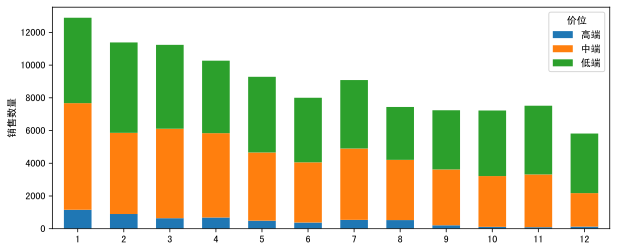

In [22]:
# ÁªòÂà∂Â†ÜÂè†Êü±Áä∂Âõæ
temp4.T.plot(
    figsize=(10, 4),
    kind='bar',
    width=0.6,
    xlabel='',
    ylabel='ÈîÄÂîÆÊï∞Èáè',
    stacked=True
)
plt.xticks(rotation=0)
plt.show()

In [23]:
# ËÆ©ÊØè‰∏ÄÈ°πÊï∞ÊçÆÈô§‰ª•ÂØπÂ∫îÊúà‰ªΩÁöÑÈîÄÂîÆÊï∞Èáè‰πãÂíå
temp5 = temp4.T.divide(temp4.sum(), axis=0)
temp5

‰ª∑‰Ωç        È´òÁ´Ø        ‰∏≠Á´Ø        ‰ΩéÁ´Ø
Êúà‰ªΩ                              
1   0.089725  0.505467  0.404808
2   0.078788  0.435924  0.485288
3   0.057128  0.486652  0.456220
4   0.066699  0.501947  0.431353
5   0.052773  0.449111  0.498115
6   0.047226  0.459645  0.493128
7   0.059542  0.479969  0.460489
8   0.070958  0.494557  0.434485
9   0.029006  0.471271  0.499724
10  0.015640  0.429619  0.554740
11  0.012372  0.429028  0.558601
12  0.021833  0.352072  0.626096

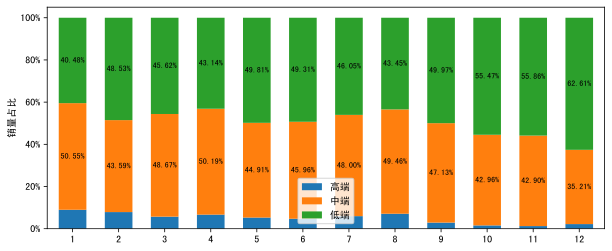

In [24]:
# ÁªòÂà∂ÁôæÂàÜÊØîÂ†ÜÂè†Êü±Áä∂Âõæ
temp5.plot(
    figsize=(10, 4),
    kind='bar',
    width=0.6,
    xlabel='',
    ylabel='ÈîÄÈáèÂç†ÊØî',
    stacked=True
)
plt.xticks(rotation=0)
plt.yticks(np.linspace(0, 1, 6), labels=[f'{x:.0%}' for x in np.linspace(0, 1, 6)])
plt.legend(loc='lower center')

for i in temp5.index:
    y1, y2, y3 = temp5.loc[i]
    plt.text(i - 1, y2 / 2 + y1, f'{y2:.2%}', ha='center', va='center', fontdict={'size': 8})
    plt.text(i - 1, y3 / 2 + y2 + y1, f'{y3:.2%}', ha='center', va='center', fontdict={'size': 8})

plt.show()

### ‰Ωú‰∏öÔºöÊãõËÅòÂ≤ó‰ΩçÊï∞ÊçÆÂàÜÊûê

1. ÁªüËÆ°Âá∫ÂüéÂ∏Ç„ÄÅÊãõËÅò‰ø°ÊÅØ„ÄÅÊãõËÅòÂ≤ó‰ΩçÁöÑÊï∞ÈáèÂíåÂπ≥ÂùáÊúàËñ™„ÄÇ
2. ÁªüËÆ°ÊØè‰∏™ÂüéÂ∏ÇÁöÑÂ≤ó‰ΩçÊï∞Èáè‰ªéÈ´òÂà∞‰ΩéÊéíÂ∫è„ÄÇ
3. ÁªüËÆ°ÊØè‰∏™ÂüéÂ∏ÇÁöÑÂπ≥ÂùáËñ™ËµÑ‰ªéÈ´òÂà∞‰ΩéÊéíÂ∫è„ÄÇ
4. ÁªüËÆ°ÊãõËÅòÂ≤ó‰ΩçÂØπÂ≠¶ÂéÜË¶ÅÊ±ÇÁöÑÂç†ÊØî„ÄÇ
5. ÁªüËÆ°ÊãõËÅòÂ≤ó‰ΩçÂØπÂ∑•‰ΩúÂπ¥ÈôêÁöÑË¶ÅÊ±ÇÂç†ÊØî„ÄÇ
6. ÂàÜÊûêËñ™ËµÑË∑üÂ≠¶ÂéÜÂíåÂ∑•‰ΩúÂπ¥ÈôêÁöÑÂÖ≥Á≥ª„ÄÇ

In [25]:
jobs_df = pd.read_csv('res/cleaned_jobs.csv')
jobs_df

company_name  salary  year  edu   job_name  pos_count  salary_lower  \
0          ËΩØÈÄöÂä®ÂäõÈõÜÂõ¢    12.5  1-3Âπ¥   Êú¨Áßë   pythonÂºÄÂèë          2            10   
1             ÊÄùÊπÉÂæ∑    30.0  3-5Âπ¥   Êú¨Áßë     python          5            20   
2            Ê∫êÁ†ÅÊó∂‰ª£    17.5  3-5Âπ¥   Â§ß‰∏ì  python ËÆ≤Â∏à          3            15   
3            ‰∏âÊ∫êÂêà‰ºó     8.0  1Âπ¥‰ª•ÂÜÖ   Êú¨Áßë     python          1             6   
4            ËΩØÈÄöÂä®Âäõ    10.5  1-3Âπ¥   Êú¨Áßë   pythonÂºÄÂèë          3             8   
...           ...     ...   ...  ...        ...        ...           ...   
6482         ÂÖ¨‰ºóÊô∫ËÉΩ     9.0  3-5Âπ¥   Êú¨Áßë       ‰∫ßÂìÅÁªèÁêÜ          2             8   
6483           ÂæÆÊÑü     9.0  3-5Âπ¥   Â§ß‰∏ì       ‰∫ßÂìÅÁªèÁêÜ          4             8   
6484         Â∑¥ÊñØÂÖâÂπ¥    15.0  3-5Âπ¥   Êú¨Áßë       ‰∫ßÂìÅÁªèÁêÜ          6            10   
6485       Ë•øÂ§ßÂçéÁâπÁßëÊäÄ     6.5  1-3Âπ¥  Á†îÁ©∂Áîü   ‰∫ßÂìÅÁªèÁêÜÔºàÂÜúËçØÔºâ          6             5   
6486       Ë•øÂÆâÁ∫ØÁ≤πÁßëÊäÄ     4.5  1-3Âπ¥   Êú¨Áßë       ‰∫ßÂìÅÁªèÁêÜ          5             3   

      salary_upper city  
0               15   ÊàêÈÉΩ  
1               40   ÊàêÈÉΩ  
2               20   ÊàêÈÉΩ  
3               10   ÊàêÈÉΩ  
4               13   ÊàêÈÉΩ  
...            ...  ...  
6482            10   Ë•øÂÆâ  
6483            10   Ë•øÂÆâ  
6484            20   Ë•øÂÆâ  
6485             8   Ë•øÂÆâ  
6486             6   Ë•øÂÆâ  

[6487 rows x 9 columns]

In [26]:
# ÁªüËÆ°ÂåóÊûÅÊòüÊåáÊ†á
city_count = jobs_df['city'].nunique()
info_count = jobs_df['company_name'].count()
post_count = jobs_df['pos_count'].sum()
salary_avg = jobs_df['salary'].mean().round(1)
print(f'ÂüéÂ∏ÇÊï∞Èáè: {city_count}')
print(f'‰ø°ÊÅØÊï∞Èáè: {info_count}')
print(f'Â≤ó‰ΩçÊï∞Èáè: {post_count}')
print(f'Âπ≥ÂùáËñ™ËµÑ: {salary_avg}')

ÂüéÂ∏ÇÊï∞Èáè: 9
‰ø°ÊÅØÊï∞Èáè: 6487
Â≤ó‰ΩçÊï∞Èáè: 22611
Âπ≥ÂùáËñ™ËµÑ: 17.0


In [27]:
# ÁªüËÆ°ÊØè‰∏™ÂüéÂ∏ÇÁöÑÂ≤ó‰ΩçÊï∞Èáè‰ªéÈ´òÂà∞‰ΩéÊéíÂ∫è
jobs_df.groupby('city')[['pos_count']].sum().sort_values(by='pos_count', ascending=False)

pos_count
city           
‰∏äÊµ∑         3158
Ê∑±Âú≥         3061
Âåó‰∫¨         3009
Êù≠Â∑û         2732
ÂπøÂ∑û         2560
Âçó‰∫¨         2345
Ê≠¶Ê±â         2031
ÊàêÈÉΩ         1913
Ë•øÂÆâ         1802

In [28]:
pd.pivot_table(
    jobs_df,
    index='city',
    values='pos_count',
    aggfunc='sum'
).sort_values(by='pos_count', ascending=False)

pos_count
city           
‰∏äÊµ∑         3158
Ê∑±Âú≥         3061
Âåó‰∫¨         3009
Êù≠Â∑û         2732
ÂπøÂ∑û         2560
Âçó‰∫¨         2345
Ê≠¶Ê±â         2031
ÊàêÈÉΩ         1913
Ë•øÂÆâ         1802

In [29]:
jobs_df.groupby('city')[['salary']].mean().round(1).sort_values(by='salary', ascending=False)

salary
city        
Âåó‰∫¨      23.6
Ê∑±Âú≥      20.3
‰∏äÊµ∑      19.8
Êù≠Â∑û      18.9
ÂπøÂ∑û      14.4
Âçó‰∫¨      14.2
ÊàêÈÉΩ      12.6
Ê≠¶Ê±â      11.8
Ë•øÂÆâ      10.5

In [30]:
# ÁªüËÆ°ÊØè‰∏™ÂüéÂ∏ÇÁöÑÂπ≥ÂùáËñ™ËµÑ‰ªéÈ´òÂà∞‰ΩéÊéíÂ∫è
pd.pivot_table(
    jobs_df,
    index='city',
    values='salary',
    aggfunc='mean'
).round(1).sort_values(by='salary', ascending=False)

salary
city        
Âåó‰∫¨      23.6
Ê∑±Âú≥      20.3
‰∏äÊµ∑      19.8
Êù≠Â∑û      18.9
ÂπøÂ∑û      14.4
Âçó‰∫¨      14.2
ÊàêÈÉΩ      12.6
Ê≠¶Ê±â      11.8
Ë•øÂÆâ      10.5

In [31]:
jobs_df['edu'] = jobs_df.edu.astype('category').cat.reorder_categories(['Â≠¶ÂéÜ‰∏çÈôê', 'Â§ß‰∏ì', 'Êú¨Áßë', 'Á†îÁ©∂Áîü'])

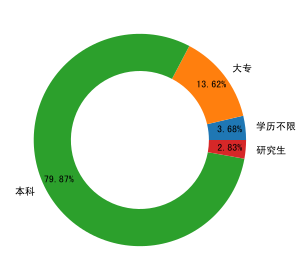

In [32]:
# ÁªüËÆ°ÊãõËÅòÂ≤ó‰ΩçÂØπÂ≠¶ÂéÜË¶ÅÊ±ÇÂç†ÊØî
pd.pivot_table(
    jobs_df,
    index='edu',
    values='pos_count',
    aggfunc='sum',
    observed=True
).plot(
    kind='pie',
    ylabel='',
    subplots=True,
    legend=False,
    autopct='%.2f%%',
    pctdistance=0.85,
    wedgeprops={'width': 0.35}
)
plt.show()

In [33]:
jobs_df['year'] = jobs_df.year.astype('category').cat.reorder_categories(['Â∫îÂ±äÁîü', '1Âπ¥‰ª•ÂÜÖ', 'ÁªèÈ™å‰∏çÈôê', '1-3Âπ¥', '3-5Âπ¥', '5Âπ¥‰ª•‰∏ä'])

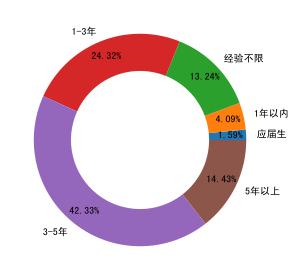

In [34]:
# ÁªüËÆ°ÊãõËÅòÂ≤ó‰ΩçÂØπÂ∑•‰ΩúÂπ¥ÈôêË¶ÅÊ±ÇÁªòÂà∂È•ºÂõæ
pd.pivot_table(
    jobs_df,
    index='year',
    values='pos_count',
    aggfunc='sum',
    observed=True
).plot(
    kind='pie',
    y='pos_count',
    ylabel='',
    legend=False,
    autopct='%.2f%%',
    pctdistance=0.85,
    wedgeprops={'width': 0.35}
)
plt.show()

In [35]:
# ÁªüËÆ°‰∏çÂêåÂ≠¶ÂéÜÂíåÂ∑•‰ΩúÂπ¥ÈôêÂπ≥ÂùáËñ™ËµÑ
temp6 = pd.pivot_table(
    jobs_df,
    index='edu',
    columns='year',
    values='salary',
    observed=False,
    fill_value=0
).round(1)
temp6

year  Â∫îÂ±äÁîü  1Âπ¥‰ª•ÂÜÖ  ÁªèÈ™å‰∏çÈôê  1-3Âπ¥  3-5Âπ¥  5Âπ¥‰ª•‰∏ä
edu                                    
Â≠¶ÂéÜ‰∏çÈôê  9.2   8.2  10.9  10.9  16.4  21.1
Â§ß‰∏ì    7.2   8.0   8.4   9.4  14.3  22.5
Êú¨Áßë    7.3   9.6  13.0  13.2  20.0  25.5
Á†îÁ©∂Áîü   8.3  12.7  15.2  17.1  24.8  30.5

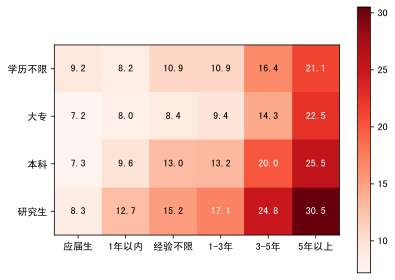

In [36]:
# ÁªòÂà∂ÁÉ≠ÂäõÂõæ
plt.imshow(temp6, cmap='Reds')
plt.xticks(np.arange(6), labels=temp6.columns)
plt.yticks(np.arange(4), labels=temp6.index)

for i in range(temp6.index.size):
    for j in range(temp6.columns.size):
        value = temp6.iat[i, j]
        color = 'w' if value > salary_avg else 'k'
        plt.text(j, i, value, ha='center', va='center', color=color)

# ÂÆöÂà∂È¢úËâ≤Êù°
plt.colorbar()
plt.show()

In [37]:
# %pip install seaborn

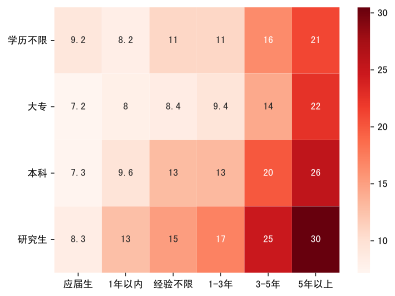

In [38]:
import seaborn as sns

sns.heatmap(temp6, cmap='Reds', annot=True)
plt.xlabel('')
plt.ylabel('')
plt.yticks(rotation=0)
plt.show()